[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gdsaxton/GDAN5400/blob/main/Week%2011%20Notebooks/GDAN%205400%20-%20Week%2011%20Notebooks%20%28II%29%20-%20Pipelines.ipynb)

# Pipelines and Preprocessing in Machine Learning

In this notebook, we'll explore how to build clean and reusable machine learning workflows using `Pipeline` and how preprocessing steps like normalization and standardization can impact model performance.

We'll cover:
- Why scaling matters
- Differences between StandardScaler and MinMaxScaler
- How to use `Pipeline` to simplify preprocessing and modeling
- Comparing models trained with and without scaling

---

<br> Read in The Usual Packages and Set up Environment

In [1]:
import numpy as np
import pandas as pd

In [2]:
#http://pandas.pydata.org/pandas-docs/stable/options.html
pd.set_option('display.max_columns', None)  #Set PANDAS to show all columns in DataFrame
pd.set_option('max_colwidth', 500)

# Set pandas display precision to 3 decimal places
pd.set_option('display.precision', 3)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Housing Prices `Training` Dataset
I have uploaded the training and test datasets onto the class GitHub repository.

In [5]:
train_url = 'https://raw.githubusercontent.com/gdsaxton/GDAN5400/refs/heads/main/Housing_Prices/train.csv'
train = pd.read_csv(train_url)
print('# of rows in training dataset:', len(train), '\n')
train[:2]

# of rows in training dataset: 1460 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# Why Scaling Matters

Some models are sensitive to the scale of input features. If one feature ranges from 1 to 1000 and another from 0 to 1, the model may unfairly prioritize the larger-scale feature.

Scaling helps ensure all features contribute equally.

To understand how scaling transforms a feature, we’ll walk through the example of `LotArea`, a numerical variable with a wide range of values.

In [7]:
train[['LotArea']].describe().T

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,10516.828,9981.265,1300.0,7553.5,9478.5,11601.5,215245.0


#### 📊 Original `LotArea` Distribution

The original `LotArea` values vary widely, with some very large outliers. This can cause problems in models that are sensitive to feature scale, such as linear models or SVMs.

---

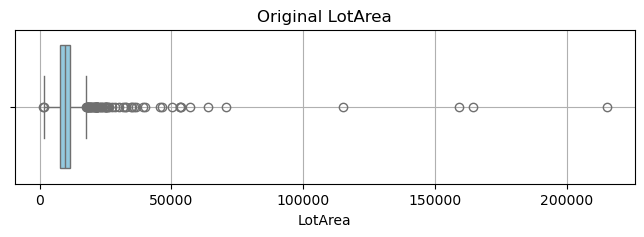

In [8]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=train['LotArea'], orient='h', color='skyblue')
plt.title('Original LotArea')
plt.xlabel('LotArea')
plt.grid(True)
plt.show()

### Apply StandardScaler to `LotArea`

`StandardScaler` rescales the feature so that it has a **mean of 0** and a **standard deviation of 1**. This transformation preserves the shape and outliers but centers and scales the values.

---

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
train['lotarea_std'] = StandardScaler().fit_transform(train[['LotArea']])

<br>Show descriptive statistics for original and standardized variable

In [13]:
train[['LotArea', 'lotarea_std']].describe().T

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,1.052e+04,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
lotarea_std,1460.0,-5.840e-17,1.000,-0.924,-0.297,-0.104,0.109,20.518


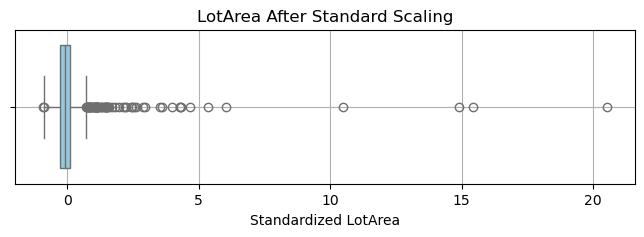

In [14]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=train['lotarea_std'], orient='h', color='skyblue')
plt.title('LotArea After Standard Scaling')
plt.xlabel('Standardized LotArea')
plt.grid(True)
plt.show()

#### What StandardScaler Does

- Centers the data: mean becomes 0  
- Normalizes spread: standard deviation becomes 1  
- Keeps outliers and distribution shape  
- Commonly used in **linear regression, logistic regression, SVMs, PCA**

---

### Apply MinMaxScaler to `LotArea`

`MinMaxScaler` rescales the data to a fixed range, usually **between 0 and 1**. This compresses extreme values and may reduce the influence of outliers.

In [16]:
from sklearn.preprocessing import MinMaxScaler
train['lotarea_mm'] = MinMaxScaler().fit_transform(train[['LotArea']])

<br>Show descriptive statistics for original, standardized, and min-max variable

In [17]:
train[['LotArea', 'lotarea_std', 'lotarea_mm']].describe().T

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,1.052e+04,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
lotarea_std,1460.0,-5.840e-17,1.000,-0.924,-0.297,-0.104,0.109,20.518
lotarea_mm,1460.0,4.308e-02,0.047,0.000,0.029,0.038,0.048,1.000


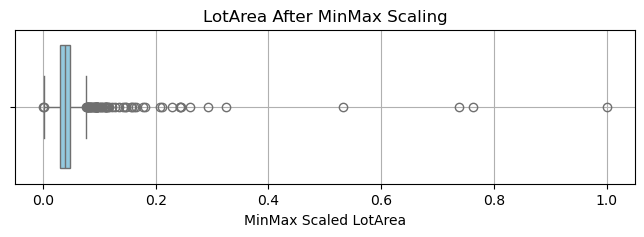

In [18]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=train['lotarea_mm'], orient='h', color='skyblue')
plt.title('LotArea After MinMax Scaling')
plt.xlabel('MinMax Scaled LotArea')
plt.grid(True)
plt.show()

---

#### What MinMaxScaler Does

- Transforms all values to the range [0, 1]  
- Compresses outliers  
- Often used when input values need to be bounded (e.g., neural networks)  

# Scaling All Numeric Features Using Pipelines

Now that we've seen how scaling works on a single variable, let's apply it to all numeric input features in our dataset.

We'll use:
- `StandardScaler` to standardize numeric values
- `ColumnTransformer` to apply scaling only to selected columns
- `Pipeline` to combine scaling and model training in one reusable object


#### Select Numeric Features

For this demonstration, we're focusing on **numeric features** because:

- Most scikit-learn preprocessing tools (like `StandardScaler` and `SimpleImputer`) work directly on numeric values.
- It allows us to demonstrate the full pipeline (imputation → scaling → modeling) without needing to encode categorical variables.
- Many regression models expect numerical input and will raise errors if given raw categorical values.

Later, we could expand our pipeline to handle categorical features using encoders (like `OneHotEncoder`), but this numeric-only subset is a clean starting point for demonstrating how pipelines work.


In [19]:
# Select all numeric predictors (excluding Id and target variable)
numeric_features = train.select_dtypes(include='number').columns.tolist()
numeric_features.remove('Id')
numeric_features.remove('SalePrice')

print(f"Number of numeric features: {len(numeric_features)}", '\n')
print(numeric_features)

Number of numeric features: 38 

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'lotarea_std', 'lotarea_mm']


<br>We can see below that 2 of the variables have missing values. 

In [20]:
train[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

### Define Preprocessor with Imputation + Scaling

#### Handling Missing Values with `SimpleImputer`

Some of the numeric features in our dataset contain missing values (`NaN`). Before we can scale or train models, we need to handle these missing values.

Specifically, we observed the following in our `train[numeric_features]` DataFrame:

- `MasVnrArea` has 1452 non-null values → 8 missing
- `GarageYrBlt` has 1379 non-null values → 81 missing
- All other numeric columns are complete (1460 non-null)

If we pass missing values into most scikit-learn models (and even into scalers like `StandardScaler`), it will raise an error.

---

#### What Does `SimpleImputer` Do?

`SimpleImputer` fills in missing values using a simple rule. In our case, we’re using:

```python
SimpleImputer(strategy='median')
```


### 🧪 Why Use a Pipeline?

In earlier Colab notebooks, we handled missing values or scaled features **manually** — often doing one step, checking the output, and then moving on to the next.

But there's a better way: **scikit-learn's `Pipeline` and `ColumnTransformer`** let us bundle multiple preprocessing steps together in a way that's:

- **Clean and readable**  
- **Safe from data leakage** (all transformations are learned from the training data only)  
- **Reusable** — great for cross-validation, hyperparameter tuning, and real-world deployment  
- **Modular** — we can plug in different models without rewriting preprocessing code  

So instead of filling missing values, then scaling, then fitting a model as separate steps, we’ll now do everything **inside a single pipeline**.

---

#### Step 1: `SimpleImputer`

Some numeric columns (like `GarageYrBlt` and `MasVnrArea`) contain missing values. Most machine learning models (and even scalers like `StandardScaler`) cannot handle these missing values directly.

We use:

```python
SimpleImputer(strategy='median')
```



This fills in missing values **using the median of each column**. Median is chosen because:

- It’s **robust to outliers**
- It gives a more stable fill-in value than the mean for skewed data

Example:  
If `GarageYrBlt` has 81 missing values and the median of the rest is 2005, those 81 values will be filled with 2005.

---



#### Step 2: `StandardScaler`

Once missing values are handled, we scale the data using:

```python
StandardScaler()
```

This transformation:

- Subtracts the mean from each value
- Divides by the standard deviation

So each feature will have:

- **Mean = 0**
- **Standard deviation = 1**

Why do this?

- Many models (like linear regression, ridge, LASSO, SVMs) **perform better or converge faster** when features are on the same scale
- It ensures that no one feature dominates just because it has larger values (e.g., `LotArea` vs `Fireplaces`)

---

#### All Together: Preprocessor Pipeline

In the code block below we will bundle the above steps into a preprocessing pipeline:

What does this do?

1. For all 36 numeric features:
   - Fill in missing values with the **median**
   - Scale all values so they have **mean 0, std 1**
2. Drops all non-numeric columns from the data
3. Packages the result so we can plug it directly into a modeling pipeline

This allows us to build models cleanly, repeatably, and safely — all without manually writing separate steps for imputation and scaling every time.

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define preprocessor: Impute missing values and scale numeric features
preprocessor_standard = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features)
], remainder='drop')

# Training 8 Models Using a Pipeline - No Scaling, Standard Scaling, and MinMax Scaling

We’ll now use the same 8 models as in our previous notebook, but each one will be trained within a pipeline that includes:
1. Preprocessing (standardizing the numeric features)
2. Model fitting

This ensures that:
- Scaling happens inside the cross-validation loop (no data leakage)
- Our code is cleaner and easier to extend

We will run this once using no scaling, then with Standard scaling, then using MinMax scaling, and then we'll compare performance.

---

### Imports, Model Definition, Train-Test Split, and RMSLE Definition
First, we will run some imports, define dictionary with our 8 models, generate the train-test split of our data, and write a function for calculating RMSLE. This will be used for running all three versions of the data (no scaling, standard scaling, and min-max scaling).

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Define models with default settings
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': RidgeCV(),
    'LASSO': LassoCV(),
    'ElasticNet': ElasticNetCV(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'SVR': SVR(),
}

# Prepare training and validation sets
X = train[numeric_features]
y = train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.metrics import mean_squared_log_error

# RMSLE scoring function
def rmsle_score(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.maximum(y_pred, 0)))

### Run Models with No Scaling

In [31]:
results_noscale = []

# Preprocessor: just impute missing values (no scaling)
preprocessor_noscale = ColumnTransformer([
    ('imputer', SimpleImputer(strategy='median'), numeric_features)
], remainder='drop')

for name, model in models.items():
    print(f"Training {name} without scaling...")

    pipe = Pipeline([
        ('preprocessor', preprocessor_noscale),
        ('regressor', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    score = rmsle_score(y_val, y_pred)

    results_noscale.append({'Model': name, 'RMSLE': score})

results_df_noscale = pd.DataFrame(results_noscale).sort_values('RMSLE')
results_df_noscale

Training LinearRegression without scaling...
Training Ridge without scaling...
Training LASSO without scaling...
Training ElasticNet without scaling...
Training DecisionTree without scaling...
Training RandomForest without scaling...
Training XGBoost without scaling...
Training SVR without scaling...


,Model,RMSLE
5,RandomForest,0.154
6,XGBoost,0.154
1,Ridge,0.189
0,LinearRegression,0.189
2,LASSO,0.200
4,DecisionTree,0.225
3,ElasticNet,0.266
7,SVR,0.432


### Run Models with StandardScaling

In [32]:
results = []

for name, model in models.items():
    print(f"Training {name} with StandardScaler...")

    pipe = Pipeline([
        ('preprocessor', preprocessor_standard),
        ('regressor', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    score = rmsle_score(y_val, y_pred)

    results.append({'Model': name, 'RMSLE': score})

results_df_standard = pd.DataFrame(results).sort_values('RMSLE')
results_df_standard

Training LinearRegression with StandardScaler...
Training Ridge with StandardScaler...
Training LASSO with StandardScaler...
Training ElasticNet with StandardScaler...
Training DecisionTree with StandardScaler...
Training RandomForest with StandardScaler...
Training XGBoost with StandardScaler...
Training SVR with StandardScaler...


,Model,RMSLE
5,RandomForest,0.154
6,XGBoost,0.154
1,Ridge,0.188
0,LinearRegression,0.189
2,LASSO,0.195
4,DecisionTree,0.232
3,ElasticNet,0.410
7,SVR,0.432


### Run Models with MinMax Scaling

In [42]:
results_minmax = []

# Preprocessor: impute + MinMax scale
preprocessor_minmax = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ]), numeric_features)
], remainder='drop')

for name, model in models.items():
    print(f"Training {name} with MinMax scaling...")

    pipe = Pipeline([
        ('preprocessor', preprocessor_minmax),
        ('regressor', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    score = rmsle_score(y_val, y_pred)

    results_minmax.append({'Model': name, 'RMSLE': score})

results_df_minmax = pd.DataFrame(results_minmax).sort_values('RMSLE')
results_df_minmax

Training LinearRegression with MinMax scaling...
Training Ridge with MinMax scaling...
Training LASSO with MinMax scaling...
Training ElasticNet with MinMax scaling...
Training DecisionTree with MinMax scaling...
Training RandomForest with MinMax scaling...
Training XGBoost with MinMax scaling...
Training SVR with MinMax scaling...


,Model,RMSLE
5,RandomForest,0.153
6,XGBoost,0.154
1,Ridge,0.178
0,LinearRegression,0.189
2,LASSO,0.202
4,DecisionTree,0.216
7,SVR,0.432
3,ElasticNet,0.441


### Merge Results Dataframes to Show RMSLE Performance Side by Side

In [43]:
# Rename RMSLE columns before merging
df_noscale = results_df_noscale.rename(columns={'RMSLE': 'RMSLE_NoScale'})
df_standard = results_df_standard.rename(columns={'RMSLE': 'RMSLE_Standard'})
df_minmax = results_df_minmax.rename(columns={'RMSLE': 'RMSLE_MinMax'})

# Merge on 'Model'
merged_results = df_noscale.merge(df_standard, on='Model').merge(df_minmax, on='Model')

# Sort by one of the RMSLE columns (e.g., StandardScaler)
merged_results = merged_results.sort_values('RMSLE_Standard')
merged_results

,Model,RMSLE_NoScale,RMSLE_Standard,RMSLE_MinMax
0,RandomForest,0.154,0.154,0.153
1,XGBoost,0.154,0.154,0.154
2,Ridge,0.189,0.188,0.178
3,LinearRegression,0.189,0.189,0.189
4,LASSO,0.200,0.195,0.202
5,DecisionTree,0.225,0.232,0.216
6,ElasticNet,0.266,0.410,0.441
7,SVR,0.432,0.432,0.432


## Evaluation of Results

Here's a **brief evaluation** of what we can see in the above table, followed by an explanation of what happened and why it matters.


| Model            | No Scaling | StandardScaler | MinMaxScaler |
|------------------|------------|----------------|--------------|
| **RandomForest**     | 0.154 ✅ | 0.154 ✅       | **0.153** ✅✅ |
| **XGBoost**          | 0.154 ✅ | 0.154 ✅       | 0.154 ✅       |
| **Ridge**            | 0.189    | 0.188          | **0.178** ✅   |
| **LinearRegression** | 0.189    | 0.189          | 0.189         |
| **LASSO**            | 0.200    | **0.195** ✅   | 0.202 ❌       |
| **DecisionTree**     | 0.225    | 0.232 ❌       | **0.216** ✅   |
| **ElasticNet**       | 0.266    | 0.410 ❌❌     | 0.441 ❌❌     |
| **SVR**              | 0.432 ❌ | 0.432 ❌       | 0.432 ❌       |

---


### Comparing Model Performance Across Scaling Methods

After training each of our 8 models using three different preprocessing strategies (no scaling, StandardScaler, and MinMaxScaler), here's what we observed:

#### Tree-Based Models
- **RandomForest** and **XGBoost** performed well with or without scaling.
- RandomForest performed **slightly better** with MinMax scaling (RMSLE = 0.153).
- This confirms that **tree-based models don't require scaling** — but they aren't hurt by it either.
- Why? These models split on thresholds (e.g., "is LotArea > 8000?") and don’t care about magnitude or distance.


---

#### Regularized Linear Models (Ridge, LASSO, ElasticNet)
- **Ridge** improved substantially with scaling, especially **MinMaxScaler**.
- **LASSO** performed best with **StandardScaler** — but worse with MinMax.
- **Ridge + MinMaxScaler** was the best linear model in this demo.
- These models rely on coefficients that are sensitive to scale — so normalizing helps them learn more efficiently.

---

####  Linear Regression (Unregularized)
- **LinearRegression** was **unaffected by scaling** — as expected, since it's not penalized by feature magnitude.

---

#### ElasticNet Got Worse With Scaling
- Surprisingly, **ElasticNet** got much worse after scaling.
- This could be due to:
  - Default hyperparameters that didn’t fit the scaled data
  - Too much regularization
- Lesson: **scaling is not always magic** — you need to tune the model too!

---

#### SVR Performs Poorly Without Tuning
- **Support Vector Regression (SVR)** performed poorly in all scenarios.
- SVR is **very sensitive** to feature scale and requires **careful tuning** of hyperparameters like `C`, `epsilon`, and the kernel type.


---

### Summary:
- **Tree-based models (XGBoost, RandomForest, DecisionTree)** perform well without scaling. Scaling has *minimal effect* — as expected — because trees are **not sensitive to feature scale**.
  - **RandomForest** performs best with **MinMaxScaler**, but only slightly better than without scaling.
  - **XGBoost** is **robust** across all scaling strategies — a strong, stable performer.
  - **DecisionTree** actually improves with **MinMaxScaler**, but degrades slightly with StandardScaler — a surprising result for a tree-based model.
- **LinearRegression** is unaffected by scaling, as expected when there's no regularization.
- **Ridge** and **LASSO** slightly improve with scaling. These are **regularized linear models**, and they often benefit from scaling.
  - **Ridge** benefits significantly from scaling, especially with **MinMaxScaler** — confirming that regularized linear models **need scaling** to perform well.
  -  **LASSO** improves with **StandardScaler**, but not with MinMax — showing how sensitive it is to how scaling is applied.
- **ElasticNet** performs much worse when scaled — likely due to poor interaction between its default hyperparameters and the transformed data.
- **SVR** performs poorly in all cases — it needs tuning to be competitive.

---

### Takeaways

> Scaling matters — but not for every model.  
> Regularized linear models often **require scaling**.  
> Tree-based models are **robust** to it.  
> And models like SVR may need both scaling **and** tuning to perform well.


### Bottom Line

- **Always scale your data** when using models that rely on distances or weights: linear models, SVMs, k-NN, etc.
- **Don’t bother scaling** for tree-based models unless you're combining them with other types.
- **Use pipelines** to keep preprocessing consistent and avoid data leakage.
- **Try multiple scalers** and watch out for models that may need tuning after scaling!